In [35]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#load ghg dataset
carbon_df = pd.read_csv('PDGES-GHGRP-GHGEmissionsGES-2004-Present (1).csv', encoding='latin-1')
carbon_df.head()

,GHGRP ID / Numéro d'identification de PDGES,Reference Year / Année de référence,Facility Name / Nom de l'installation,Facility Location / Emplacement de l'installation,Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation,Facility Province or Territory / Province ou territoire de l'installation,Facility Postal Code / Code postal de l'installation,Latitude,Longitude,Facility NPRI ID / Numéro d'identification de l'INRP,...,C4F8 (tonnes),C4F8 (tonnes CO2e / tonnes éq. CO2),C5F12 (tonnes),C5F12 (tonnes CO2e / tonnes éq. CO2),C6F14 (tonnes),C6F14 (tonnes CO2e / tonnes éq. CO2),PFC Total (tonnes CO2e / tonnes éq. CO2),SF6 (tonnes),SF6 (tonnes CO2e / tonnes éq. CO2),Total Emissions (tonnes CO2e) / Émissions totales (tonnes éq. CO2)
0,G10001,2020,Division Alma,1100 Melanion Street,Alma,Quebec,G8B 5W2,48.56500,-71.65556,983.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,7.779969e+04
1,G10003,2020,"Foothills Pipeline, Alberta",NaN,Airdrie,Alberta,T4A 2G7,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,2.878482e+05
2,G10004,2020,Kingston CoGen,5146 Taylor-Kidd Boulevard,Bath,Ontario,K0H 1G0,44.20950,-76.72460,5765.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,3.237168e+02
3,G10006,2020,Redwater Fertilizer Operations,56225 SH643,Sturgeon County,Alberta,T0A 2W0,53.84200,-113.09300,2134.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,1.091022e+06
4,G10007,2020,Alberta Envirofuels,9511 17 Street Northwest,Edmonton,Alberta,T6P 1Y3,53.53199,-113.36492,3974.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,3.016439e+05


In [17]:
#get summarized info
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13093 entries, 0 to 13092
Data columns (total 77 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   GHGRP ID / Numéro d'identification de PDGES                                                                                      13093 non-null  object 
 1   Reference Year / Année de référence                                                                                              13093 non-null  int64  
 2   Facility Name / Nom de l'installation                                                                                            13093 non-null  object 
 3   Facility Location / Emplacement de l'installation                                               

In [18]:
#only take years from 2014 to 2019 (inclusive)
carbon_df = carbon_df[(carbon_df['Reference Year / Année de référence'] >= 2015) & (carbon_df['Reference Year / Année de référence'] <= 2019)]

In [19]:
#select relevant columns
carbon_df = carbon_df.iloc[:,[1,5,26]]
carbon_df.head()

,Reference Year / Année de référence,Facility Province or Territory / Province ou territoire de l'installation,CO2 (tonnes)
1703,2019,Quebec,7.143435e+04
1704,2019,Alberta,3.740449e+05
1705,2019,Ontario,9.745530e+02
1706,2019,Alberta,1.143131e+06
1707,2019,Alberta,2.648890e+05


In [20]:
carbon_df = carbon_df.rename(columns={"Reference Year / Année de référence": "year",
                                     "Facility Province or Territory / Province ou territoire de l'installation": "province",
                                     "CO2 (tonnes)": "co2_tonnes"})
carbon_df.head()

,year,province,co2_tonnes
1703,2019,Quebec,7.143435e+04
1704,2019,Alberta,3.740449e+05
1705,2019,Ontario,9.745530e+02
1706,2019,Alberta,1.143131e+06
1707,2019,Alberta,2.648890e+05


In [21]:
carbon_df["federal_party"] = ["a"]*len(carbon_df.year)

carbon_df.federal_party[carbon_df.province == "Alberta"] = "Conservative"

carbon_df.federal_party[carbon_df.province == "Ontario"] = "Liberal"

carbon_df.federal_party[(carbon_df.province == "Quebec") & (carbon_df.year == 2015)] = "Liberal"
carbon_df.federal_party[(carbon_df.province == "Quebec") & (carbon_df.year == 2019)] = "Bloc Québécois"

carbon_df.federal_party[carbon_df.province == "British Columbia"] = "Liberal"

carbon_df.federal_party[(carbon_df.province == "New Brunswick") & (carbon_df.year == 2015)] = "Liberal"
carbon_df.federal_party[(carbon_df.province == "New Brunswick") & (carbon_df.year == 2019)] = "Conservative"

carbon_df.federal_party[carbon_df.province == "Saskatchewan"] = "Conservative"

carbon_df.federal_party[carbon_df.province == "Manitoba"] = "Conservative"

carbon_df.federal_party[carbon_df.province == "Nova Scotia"] = "Liberal"

carbon_df.federal_party[carbon_df.province == "Newfoundland and Labrador"] = "Liberal"

carbon_df.federal_party[carbon_df.province == "Prince Edward Island"] = "Liberal"

carbon_df.federal_party[carbon_df.province == "Yukon"] = "Liberal"

carbon_df.federal_party[carbon_df.province == "Northwest Territories"] = "Liberal"

carbon_df.federal_party[carbon_df.province == "Nunavut"] = "New Democratic Party"

C:\Users\tharu\AppData\Local\Temp\ipykernel_12704\3363367578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carbon_df.federal_party[carbon_df.province == "Alberta"] = "Conservative"
C:\Users\tharu\AppData\Local\Temp\ipykernel_12704\3363367578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carbon_df.federal_party[carbon_df.province == "Ontario"] = "Liberal"
C:\Users\tharu\AppData\Local\Temp\ipykernel_12704\3363367578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [22]:
carbon_df.head()

,year,province,co2_tonnes,federal_party
1703,2019,Quebec,7.143435e+04,Bloc Québécois
1704,2019,Alberta,3.740449e+05,Conservative
1705,2019,Ontario,9.745530e+02,Liberal
1706,2019,Alberta,1.143131e+06,Conservative
1707,2019,Alberta,2.648890e+05,Conservative


In [24]:
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6330 entries, 1703 to 8032
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6330 non-null   int64  
 1   province       6330 non-null   object 
 2   co2_tonnes     6218 non-null   float64
 3   federal_party  6330 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 247.3+ KB


We can row-concatenate the parliamentary data from different years, and join the carbon emissions dataset on (speakerparty == federal_party)

In [25]:
df = pd.read_csv('2019-1-28.csv')
df.head()

,basepk,hid,speechdate,pid,opid,speakeroldname,speakerposition,maintopic,subtopic,subsubtopic,speechtext,speakerparty,speakerriding,speakername,speakerurl
0,4767006,ca.proc.d.2019-01-28.10450751,2019-01-28,3176068f-62ee-4b2f-aacd-1131201c6db1,214707.0,The Speaker,NaN,NaN,NaN,NaN,"My dear colleagues, I would like to begin by a...",Liberal,Halifax West,Geoff Regan,http://www.parl.gc.ca/Parliamentarians/en/memb...
1,4767007,ca.proc.d.2019-01-28.10450753,2019-01-28,3176068f-62ee-4b2f-aacd-1131201c6db1,214707.0,The Speaker,NaN,NaN,Vacancy,Nanaimo—Ladysmith,It is my duty to inform the House that a vacan...,Liberal,Halifax West,Geoff Regan,http://www.parl.gc.ca/Parliamentarians/en/memb...
2,4767008,ca.proc.d.2019-01-28.10450758,2019-01-28,6dfe3b54-024b-432d-bc01-7f89da30b7cd,239943.0,Mr. Dave Van Kesteren (Chatham-Kent—Leamington...,NaN,Private Members' Business,Dutch Heritage Day,NaN,"moved: \n That, in the opinion of the House, ...",Conservative,Chatham-Kent—Leamington,Dave Van Kesteren,http://www.parl.gc.ca/Parliamentarians/en/memb...
3,4767009,ca.proc.d.2019-01-28.10450788,2019-01-28,07cf5767-802c-406c-92a7-7dc92af79b40,229526.0,Mr. Kevin Lamoureux (Parliamentary Secretary t...,NaN,Private Members' Business,Dutch Heritage Day,NaN,"Mr. Speaker, I appreciate the comments from my...",Liberal,Winnipeg North,Kevin Lamoureux,http://www.parl.gc.ca/Parliamentarians/en/memb...
4,4767010,ca.proc.d.2019-01-28.10450790,2019-01-28,6dfe3b54-024b-432d-bc01-7f89da30b7cd,239943.0,Mr. Dave Van Kesteren,NaN,Private Members' Business,Dutch Heritage Day,NaN,"Mr. Speaker, I am going to quote my mother aga...",Conservative,Chatham-Kent—Leamington,Dave Van Kesteren,http://www.parl.gc.ca/Parliamentarians/en/memb...


In [32]:
df_carbon = df.loc[df.speechtext.str.lower().str.contains('carbon tax'),:]
df_carbon.shape

(22, 15)

In [44]:
filter_ = df_carbon.speechtext.str.extract(r'(climate change|global warming|climate action|climate crisis|environment|conservation|sustainability|green|emission standards|renewables|renewable energy|emission standards)').dropna()
filter_.shape

(10, 1)

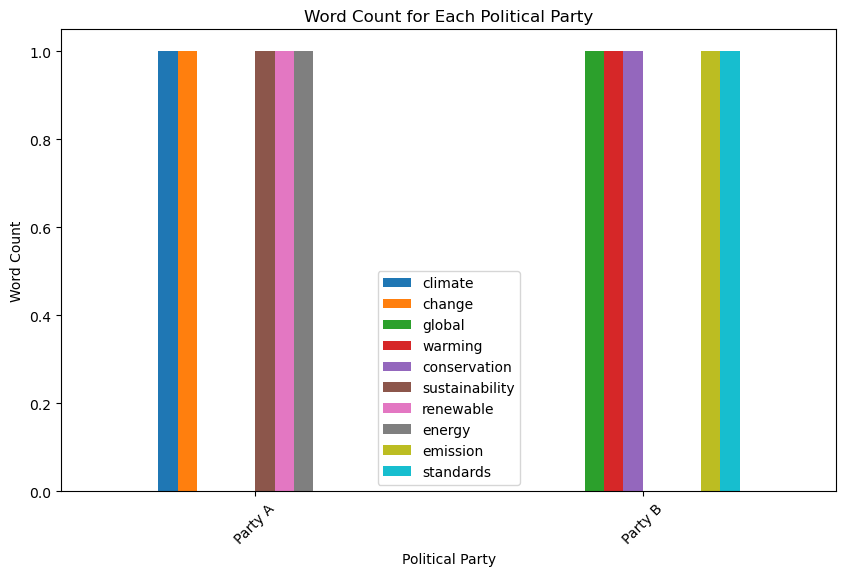

In [45]:


# Function to count occurrences of words in a text
def count_words(text):
    counts = {}
    for word in words_to_count:
        counts[word] = text.lower().count(word)
    return counts

# Apply the function to each row of the DataFrame to count occurrences for each political party
df['word_counts'] = df['speechtext'].apply(count_words)

# Create separate columns for each word count
word_count_df = pd.DataFrame(df['word_counts'].tolist(), index=df.index)

# Combine the word count DataFrame with the original DataFrame
df_combined = pd.concat([df['speakerparty'], word_count_df], axis=1)

# Group by political party and sum the word counts
party_word_counts = df_combined.groupby('speakerparty').sum()

# Plotting
party_word_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Word Count for Each Political Party')
plt.xlabel('Political Party')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
filter_

In [ ]:
df_carbon.iloc[filter_.index,:].iloc[0,10]